# **CVPS20 // Machine Learning Introduction**

*October 13, 2020*

This notebook provides an example of training an unsupervised Machine Learning model on imaging data.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

### Unsupervised Learning: Image Segmentation with K-Means

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


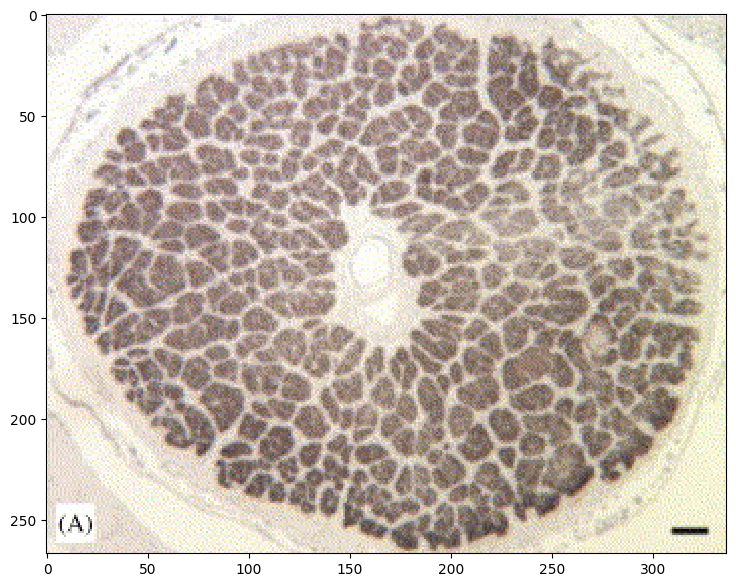

In [4]:
# -- load the eye image
fname = "/content/drive/My Drive/cvps20/data/examples/axons_eye.jpg"
img = np.asarray(iio.v2.imread(fname)) / 255.

# -- sub-select panel (A)
panA = img[11:278, 10:347, :]

# -- display
plt.imshow(panA)

We can consider this image as a collection of objects where **each pixel is an object** and the **three color values are the <u>features</u>** of that object.

Let's reshape the data into the **$N_O \times N_F$** paradigm,


In [5]:
# -- calculate the total number of pixels (objects)
nrow = panA.shape[0]
ncol = panA.shape[1]
npix = nrow*ncol
npix

89979

In [6]:
# -- reshape the image so that it is Npix x Nfeat
feat = panA.reshape(npix, 3)

print("shape of features array : {0}".format(feat.shape))

shape of features array : (89979, 3)


These features can then be used to group pixels (objects) with similar color values (features) together via clustering,

In [7]:
# -- instantiate the model
ncl = 3
km = KMeans(n_clusters=ncl)

# -- fit the model

km.fit(feat)

KMeans(n_clusters=3)

In [8]:
km.inertia_

1360.1343909379768

In [9]:
# -- attributes that end with an underscore are results of the fit
print("cluster centers : \n{0}".format(km.cluster_centers_))
print("\nobject labels : \n{0}".format(km.labels_))

cluster centers : 
[[0.93553746 0.91148888 0.85832282]
 [0.74584592 0.68315997 0.64252643]
 [0.55002182 0.47851254 0.43378822]]

object labels : 
[0 0 0 ... 0 0 0]


In [10]:
np.unique(km.labels_)

array([0, 1, 2], dtype=int32)

There are now $N_{\rm pix}$ labels, and so we can reshape those **back into the shape of the original image**,

In [11]:
# -- create a labeled image
limg = km.labels_.reshape(nrow,ncol)

In [12]:
limg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

<ipython-input-28-b6d10e9f3253>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  im = ax.imshow(limg, clim=[-0.5, ncl - 0.5], cmap=plt.cm.get_cmap("viridis", ncl))


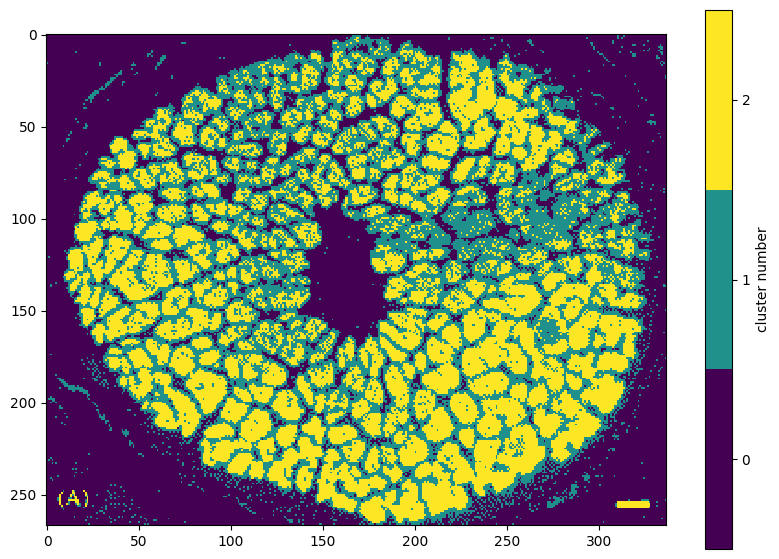

In [28]:
# -- display
fig, ax = plt.subplots()
im = ax.imshow(limg, clim=[-0.5, ncl - 0.5], cmap=plt.cm.get_cmap("viridis", ncl))
fig.colorbar(im, ticks=range(ncl), label="cluster number")
fig.show()